#Clustering Untuk Rekomendasi Promo Loyal Customer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv("/content/sample_data/segmentation data.csv")

In [ ]:
print(df)

             ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
0                   2  
1                   2  
2              

In [ ]:
print(df.describe())

                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000        

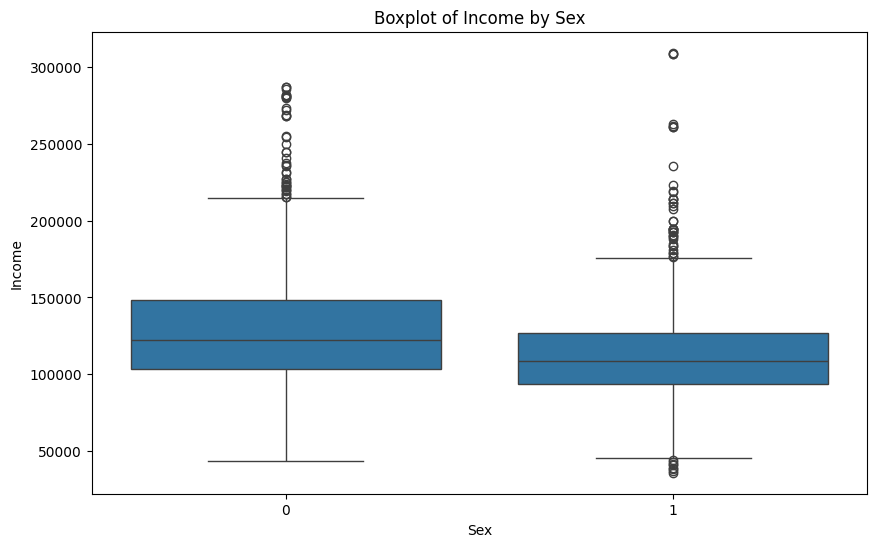

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Income', data=df)
plt.title('Boxplot of Income by Sex')
plt.show()

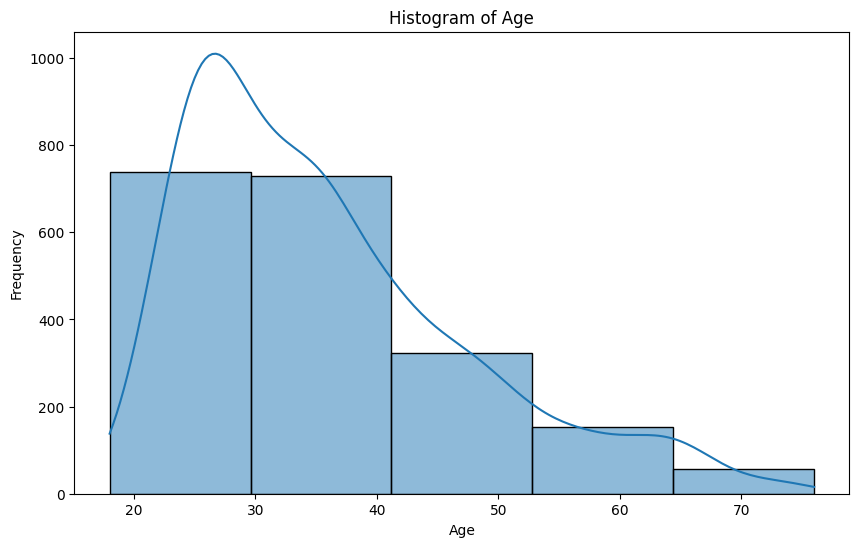

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=5, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

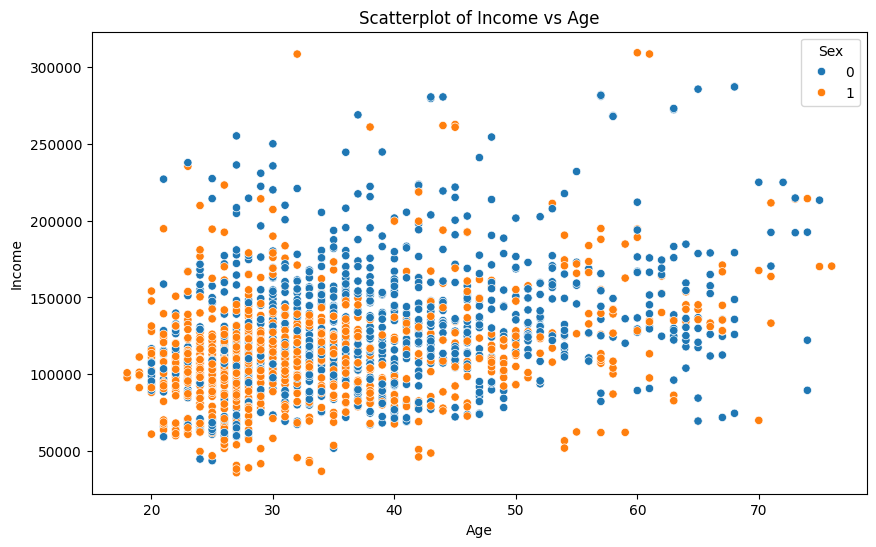

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df, hue='Sex')
plt.title('Scatterplot of Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

<Axes: title={'center': 'Histogram of Income'}, xlabel='Income', ylabel='Count'>

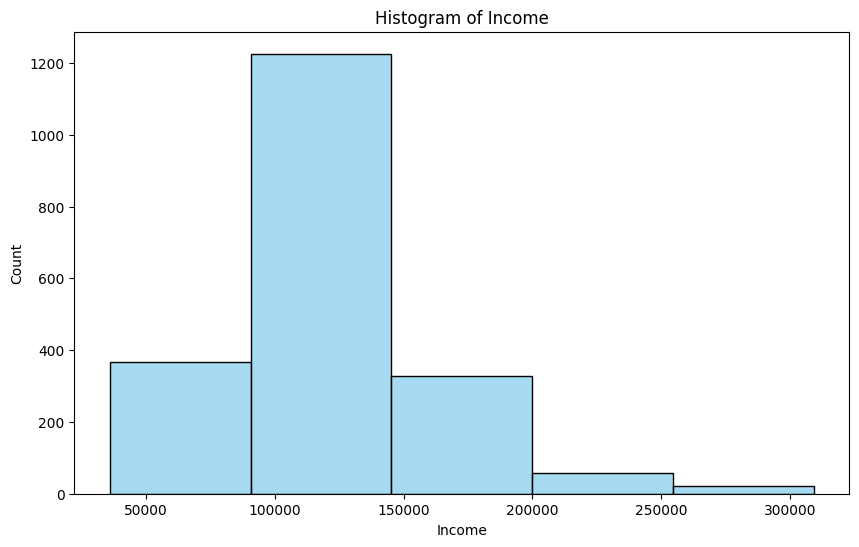

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Histogram of Income")
sns.histplot(df['Income'], bins=5, kde=False, color='skyblue')

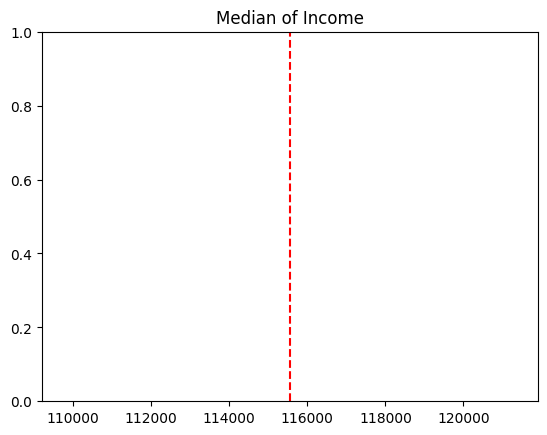

In [ ]:
median_income = df['Income'].median()
plt.title("Median of Income")
plt.axvline(median_income, color='red', linestyle='--', label='Median')

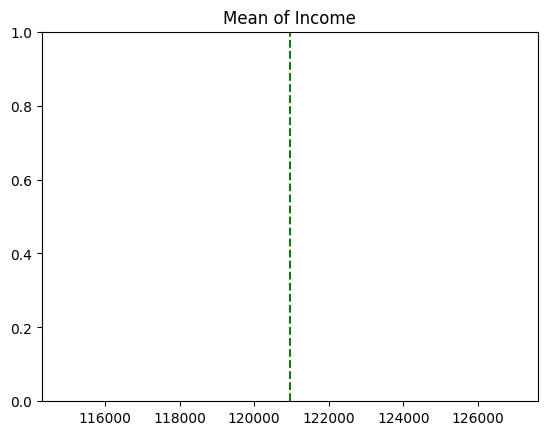

In [ ]:
mean_income = df['Income'].mean()
plt.title("Mean of Income")
plt.axvline(mean_income, color='green', linestyle='--', label='Mean')

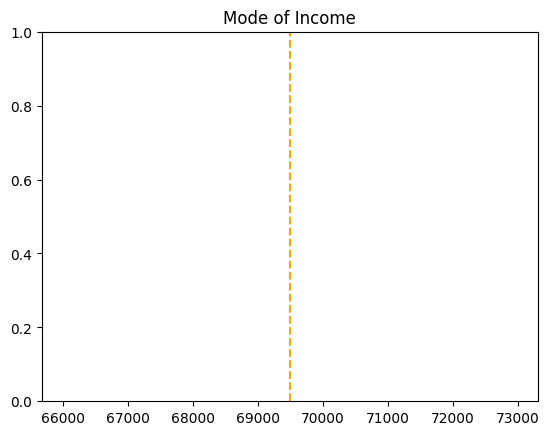

In [ ]:
mode_income = df['Income'].mode()[0]
plt.title("Mode of Income")
plt.axvline(mode_income, color='orange', linestyle='--', label='Mode')

<Axes: title={'center': 'Kernel Density Estimate'}, xlabel='Income', ylabel='Density'>

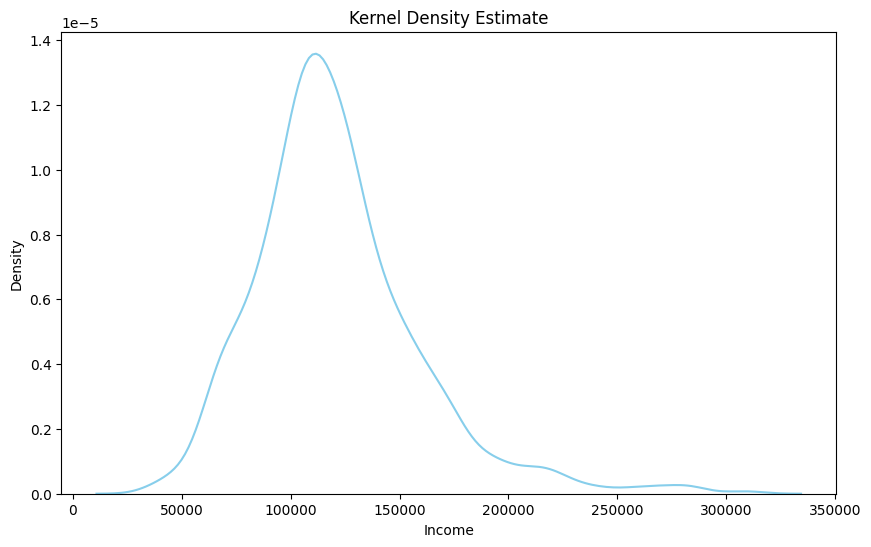

In [ ]:
plt.figure(figsize=(10, 6)) #menunjukkan kepadatan probabilitas di sepanjang sumbu nilai variabel, untuk memvisualisasikan distribusi data secara lebih halus daripada histogram
plt.title("Kernel Density Estimate")
sns.kdeplot(df['Income'], color='skyblue', label='Income')

<Axes: xlabel='Income', ylabel='Count'>

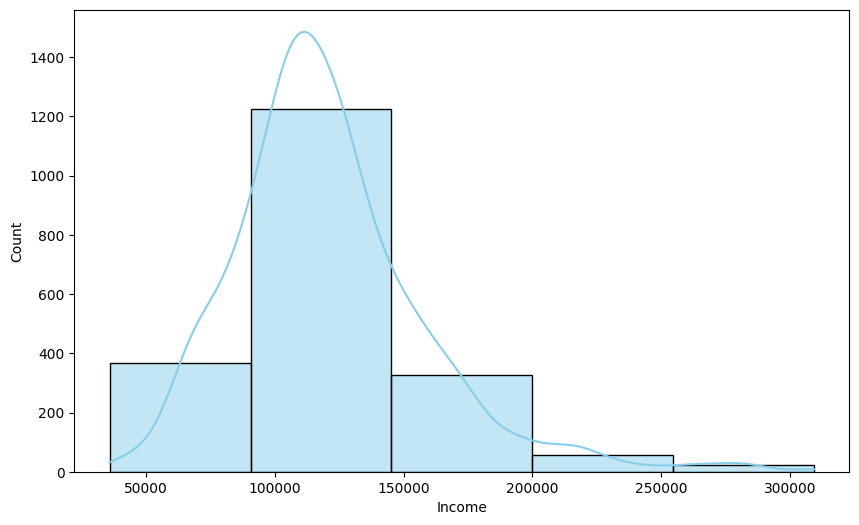

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=5, kde=True, color='skyblue')

##Clustering

####1. Pemilihan Fitur->memilih subset fitur dari dataset yang paling relevan atau informatif untuk masalah yang sedang dihadapi

                       ID       Sex  Marital status       Age  Education  \
ID               1.000000  0.328262        0.074403 -0.085246   0.012543   
Sex              0.328262  1.000000        0.566511 -0.182885   0.244838   
Marital status   0.074403  0.566511        1.000000 -0.213178   0.374017   
Age             -0.085246 -0.182885       -0.213178  1.000000   0.654605   
Education        0.012543  0.244838        0.374017  0.654605   1.000000   
Income          -0.303217 -0.195146       -0.073528  0.340610   0.233459   
Occupation      -0.291958 -0.202491       -0.029490  0.108388   0.064524   
Settlement size -0.378445 -0.300803       -0.097041  0.119751   0.034732   

                   Income  Occupation  Settlement size  
ID              -0.303217   -0.291958        -0.378445  
Sex             -0.195146   -0.202491        -0.300803  
Marital status  -0.073528   -0.029490        -0.097041  
Age              0.340610    0.108388         0.119751  
Education        0.233459    0

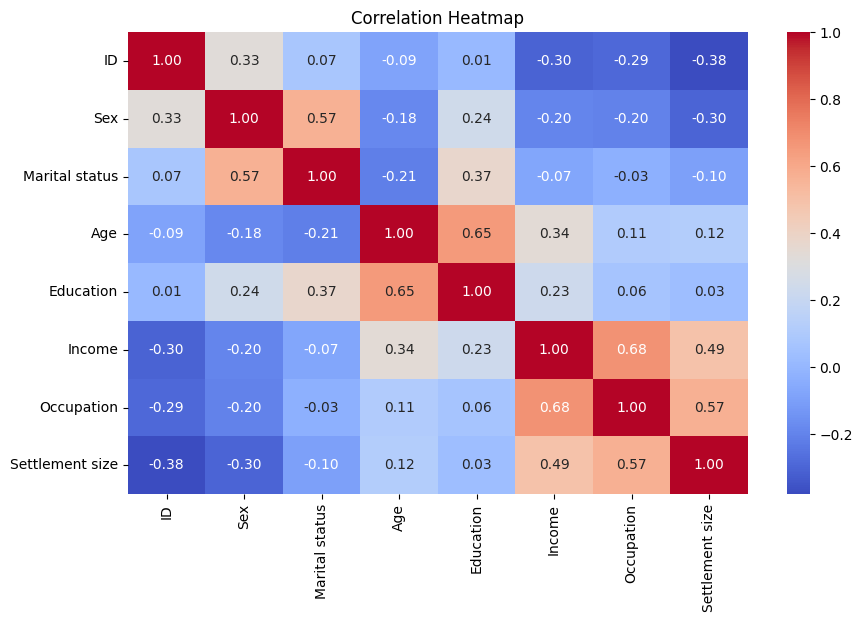

In [ ]:
#pemilihan fitur berdasarkan korelasi
correlation_matrix = df.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Hasil: fitur-fitur yang paling kuat korelasi positifnya adalah:
1. income dengan occupation (0.68)
2. age dengan education (0.65)
Namun, karena yang ingin dianalisis adalah perilaku belanja, maka fitur-fitur yg berhubungan langsung adalah income, occupation, dan age.

In [ ]:
features = ['Age','Income','Occupation']
X = df[features]

###2. Modelling -> K-Means

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k = 3
kmeans = KMeans(n_clusters=k)

In [ ]:
#training model
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
#evaluation model
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5116316420653049


In [ ]:
#interpretasi hasil
df['cluster'] = kmeans.labels_
print(df.groupby('cluster').mean())

                   ID       Sex  Marital status        Age  Education  \
cluster                                                                 
0        1.000009e+08  0.386062        0.448009  37.748894   1.071903   
1        1.000007e+08  0.293333        0.457778  43.875556   1.346667   
2        1.000012e+08  0.572905        0.556831  31.941447   0.923077   

                Income  Occupation  Settlement size  
cluster                                              
0        131306.526549    0.991150         0.949115  
1        197576.120000    1.577778         1.364444  
2         90416.889782    0.424799         0.359357  


Hasil = 0.51 menunjukkan bahwa model clusteringnya menghasilkan kelompok yang relatif baik (mayoritas data berada dalam klaster yang sesuai dengan karakteristik mereka sendiri)

###3. Visualisasi Hasil Clustering

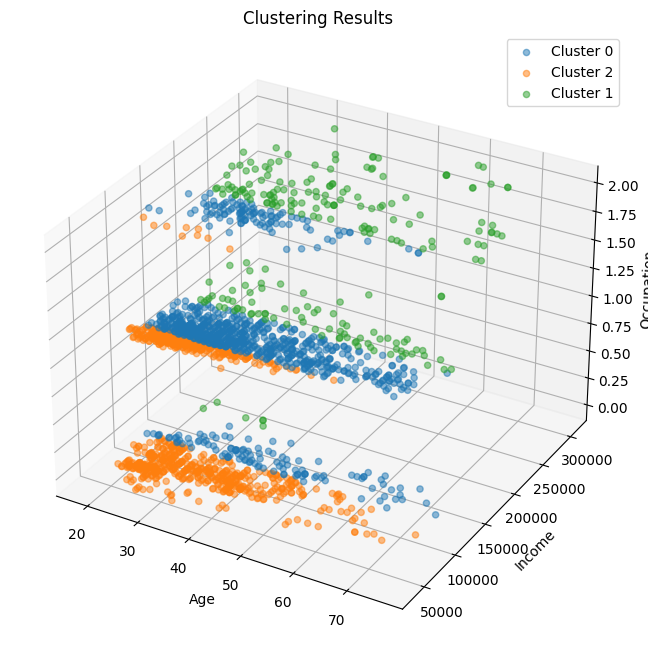

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in df['cluster'].unique():
    ax.scatter(df[df['cluster'] == cluster]['Age'],
               df[df['cluster'] == cluster]['Income'],
               df[df['cluster'] == cluster]['Occupation'],
               label=f'Cluster {cluster}', alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Occupation')
ax.set_title('Clustering Results')
ax.legend()
plt.show()